OUTLIER DETECTION AND CLEANING - MEMORY STRESS ANALYSIS

📊 Processing Memory Utilization:
  🔍 MEM STRESS:
    ✅ No outliers detected
  🔍 BASELINE:
    ✅ No outliers detected

📊 Processing Memory Cache:
  🔍 MEM STRESS:
    ✅ No outliers detected
  🔍 BASELINE:
    ✅ No outliers detected

📊 Processing Memory Available:
  🔍 MEM STRESS:
    ✅ No outliers detected
  🔍 BASELINE:
    ✅ No outliers detected

COMPREHENSIVE MEMORY STRESS ANALYSIS

🔄 Analyzing Memory Utilization...


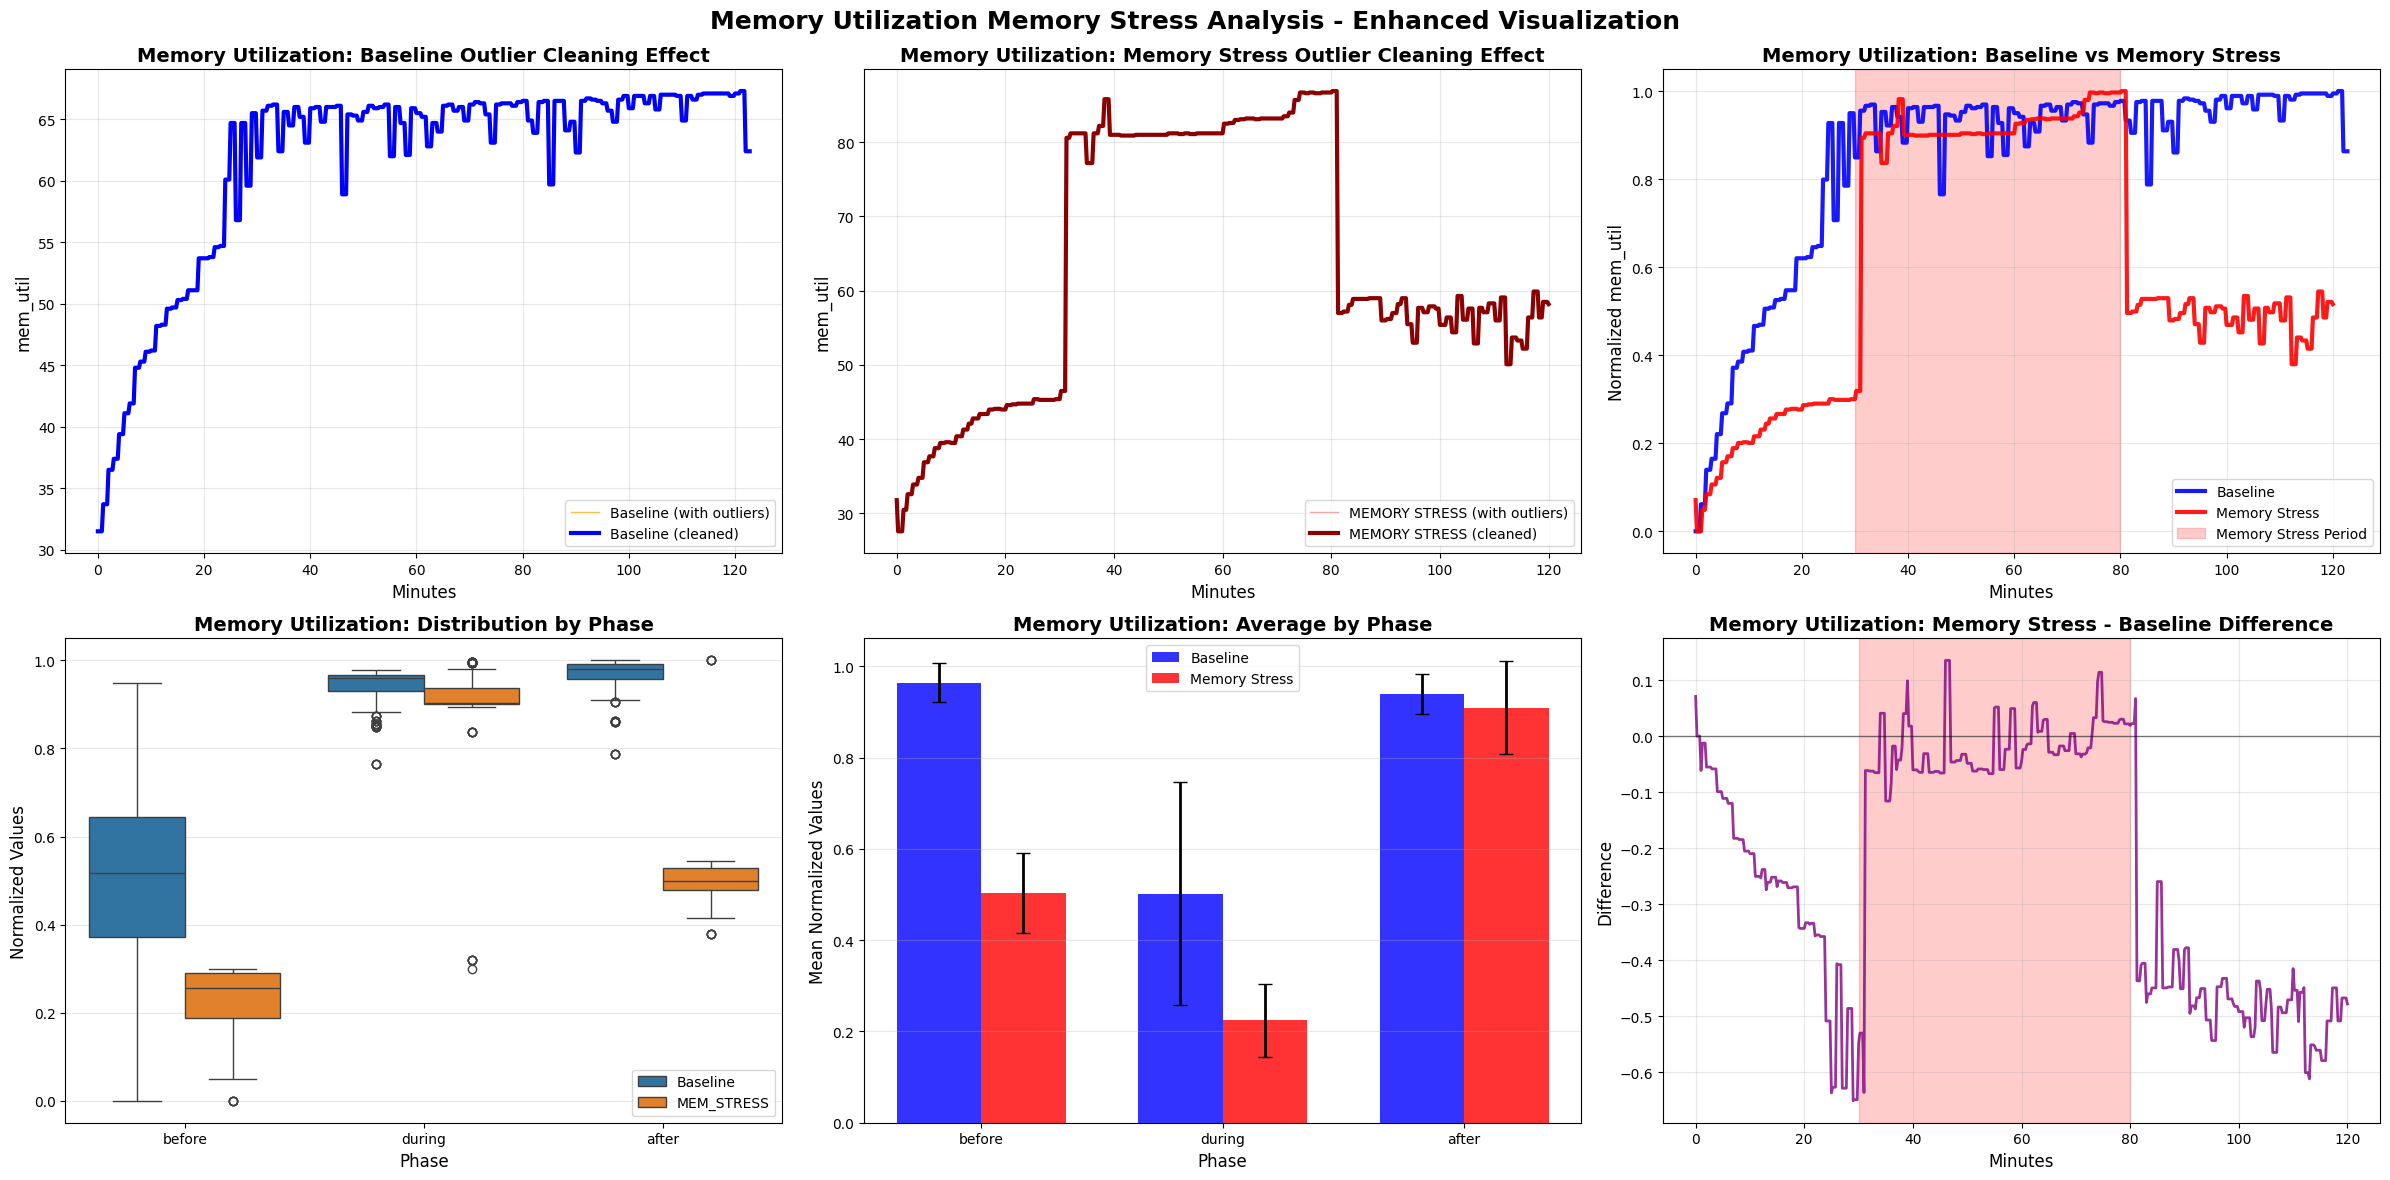


MEMORY UTILIZATION - MEMORY STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9648  0.0432  0.7877  1.0000
before  0.5023  0.2447  0.0000  0.9497
during  0.9395  0.0430  0.7654  0.9777

📊 MEMORY STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5043  0.0879  0.3794  1.0000
before  0.2241  0.0810  0.0000  0.3002
during  0.9094  0.1015  0.3002  0.9966

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 11.82, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=  3.86, p=  0.0001 (✅ SIGNIFICANT)
  AFTER   : t= 61.09, p=  0.0000 (✅ SIGNIFICANT)

📈 MEMORY STRESS IMPACT (% CHANGE):
  BEFORE  :  -55.38% (↘️ DECREASE)
  DURING  :   -3.20% (↘️ DECREASE)
  AFTER   :  -47.74% (↘️ DECREASE)

🔄 Analyzing Memory Cache...


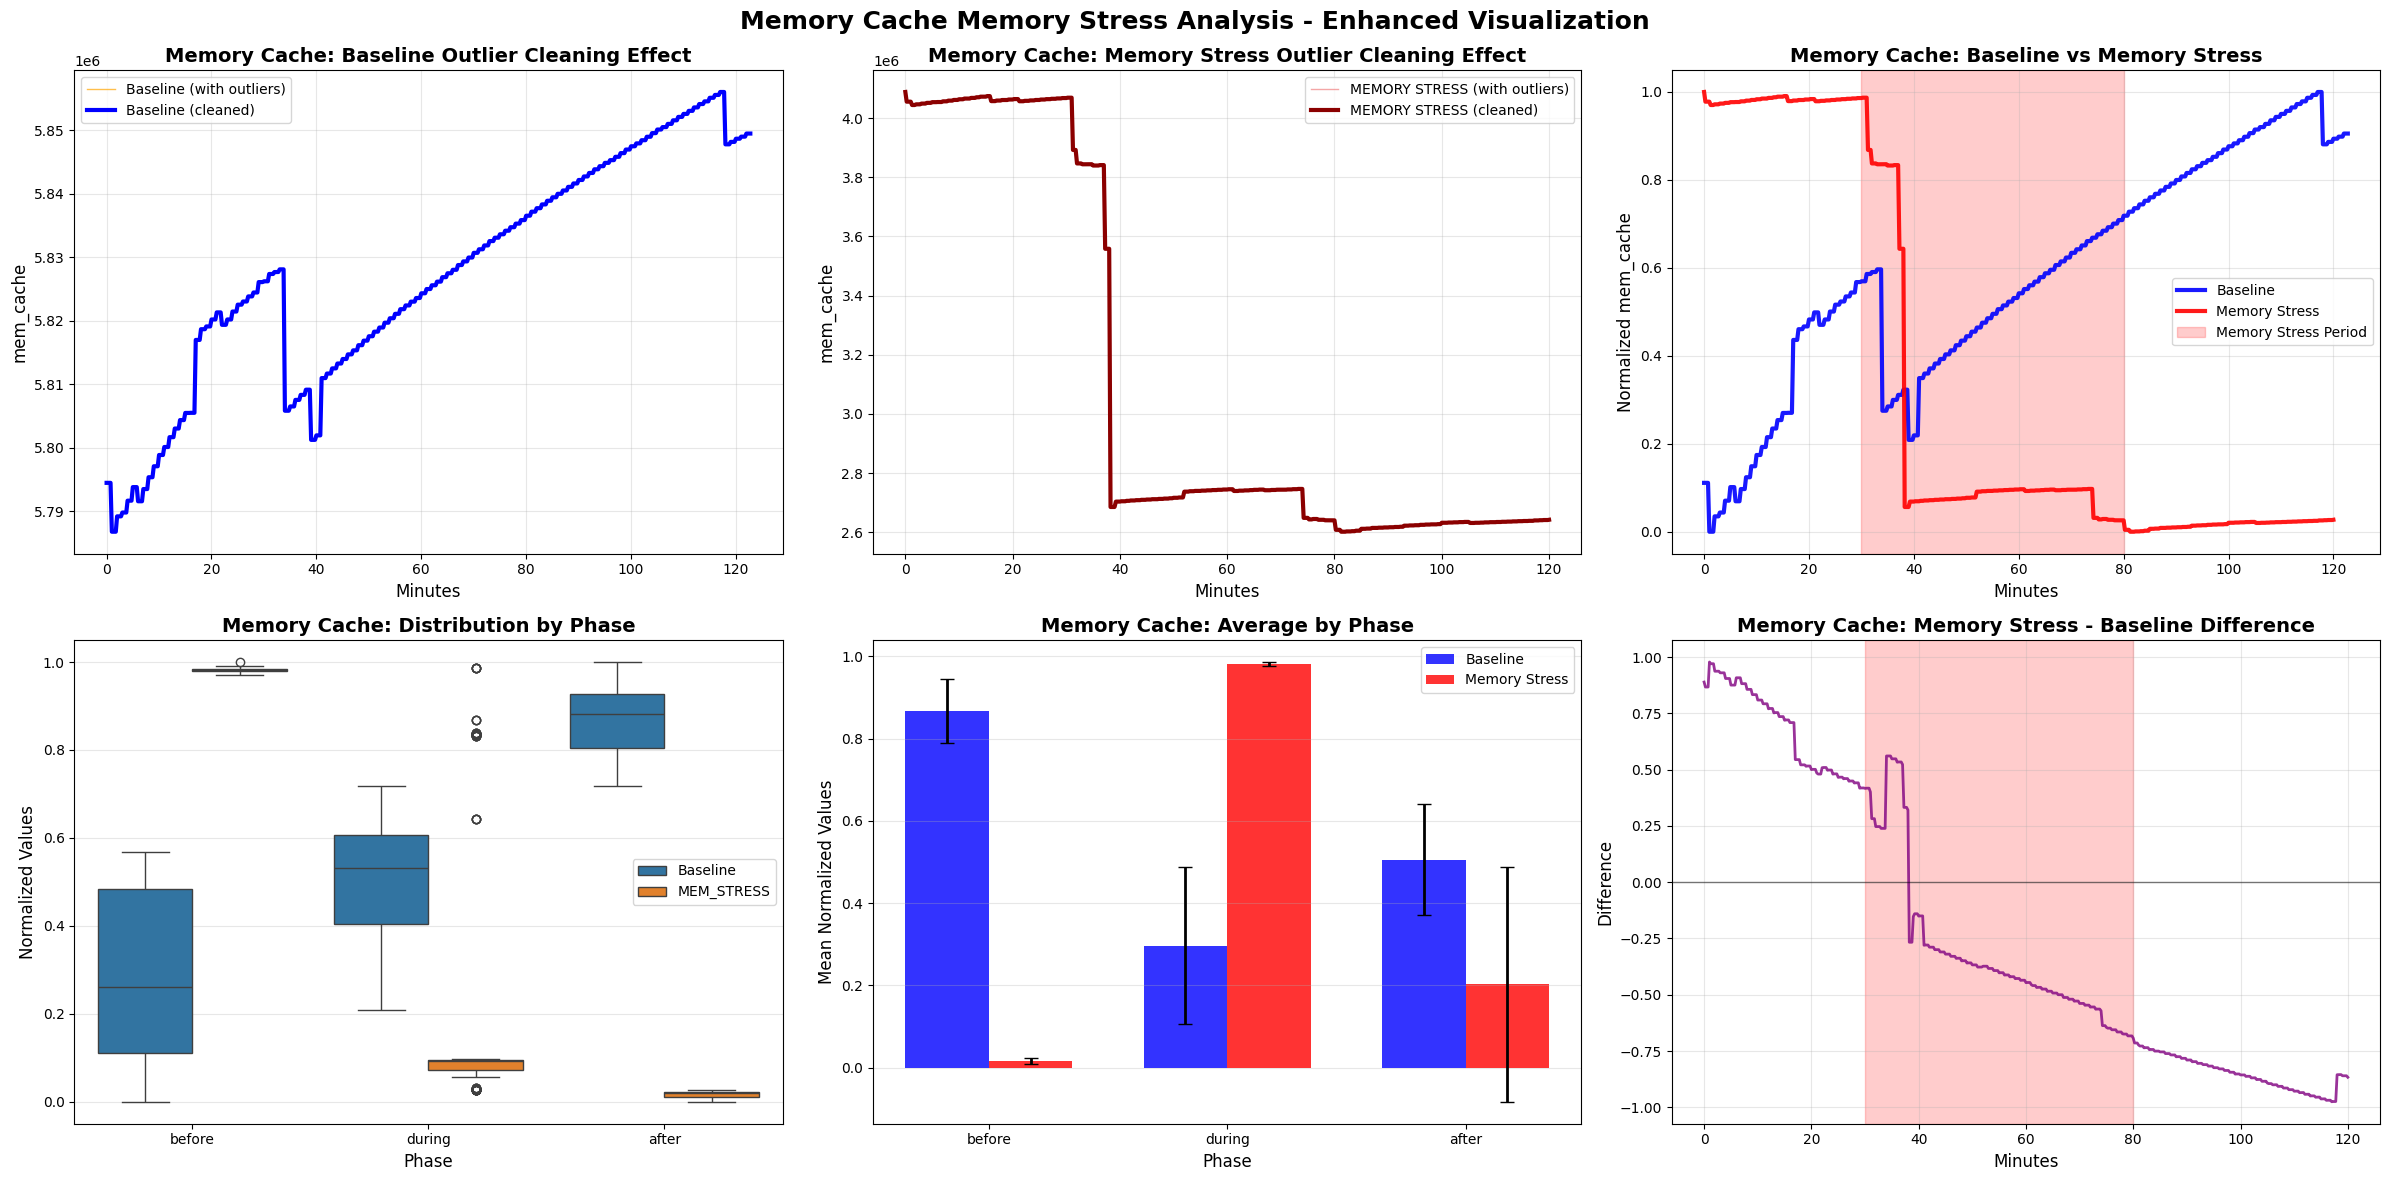


MEMORY CACHE - MEMORY STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8676  0.0784  0.7186  1.0000
before  0.2966  0.1901  0.0000  0.5677
during  0.5059  0.1345  0.2089  0.7186

📊 MEMORY STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0162  0.0077  0.0000  0.0271
before  0.9815  0.0049  0.9704  1.0000
during  0.2025  0.2854  0.0259  0.9870

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-39.45, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 13.63, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=136.80, p=  0.0000 (✅ SIGNIFICANT)

📈 MEMORY STRESS IMPACT (% CHANGE):
  BEFORE  : +230.93% (↗️ INCREASE)
  DURING  :  -59.98% (↘️ DECREASE)
  AFTER   :  -98.13% (↘️ DECREASE)

🔄 Analyzing Memory Available...


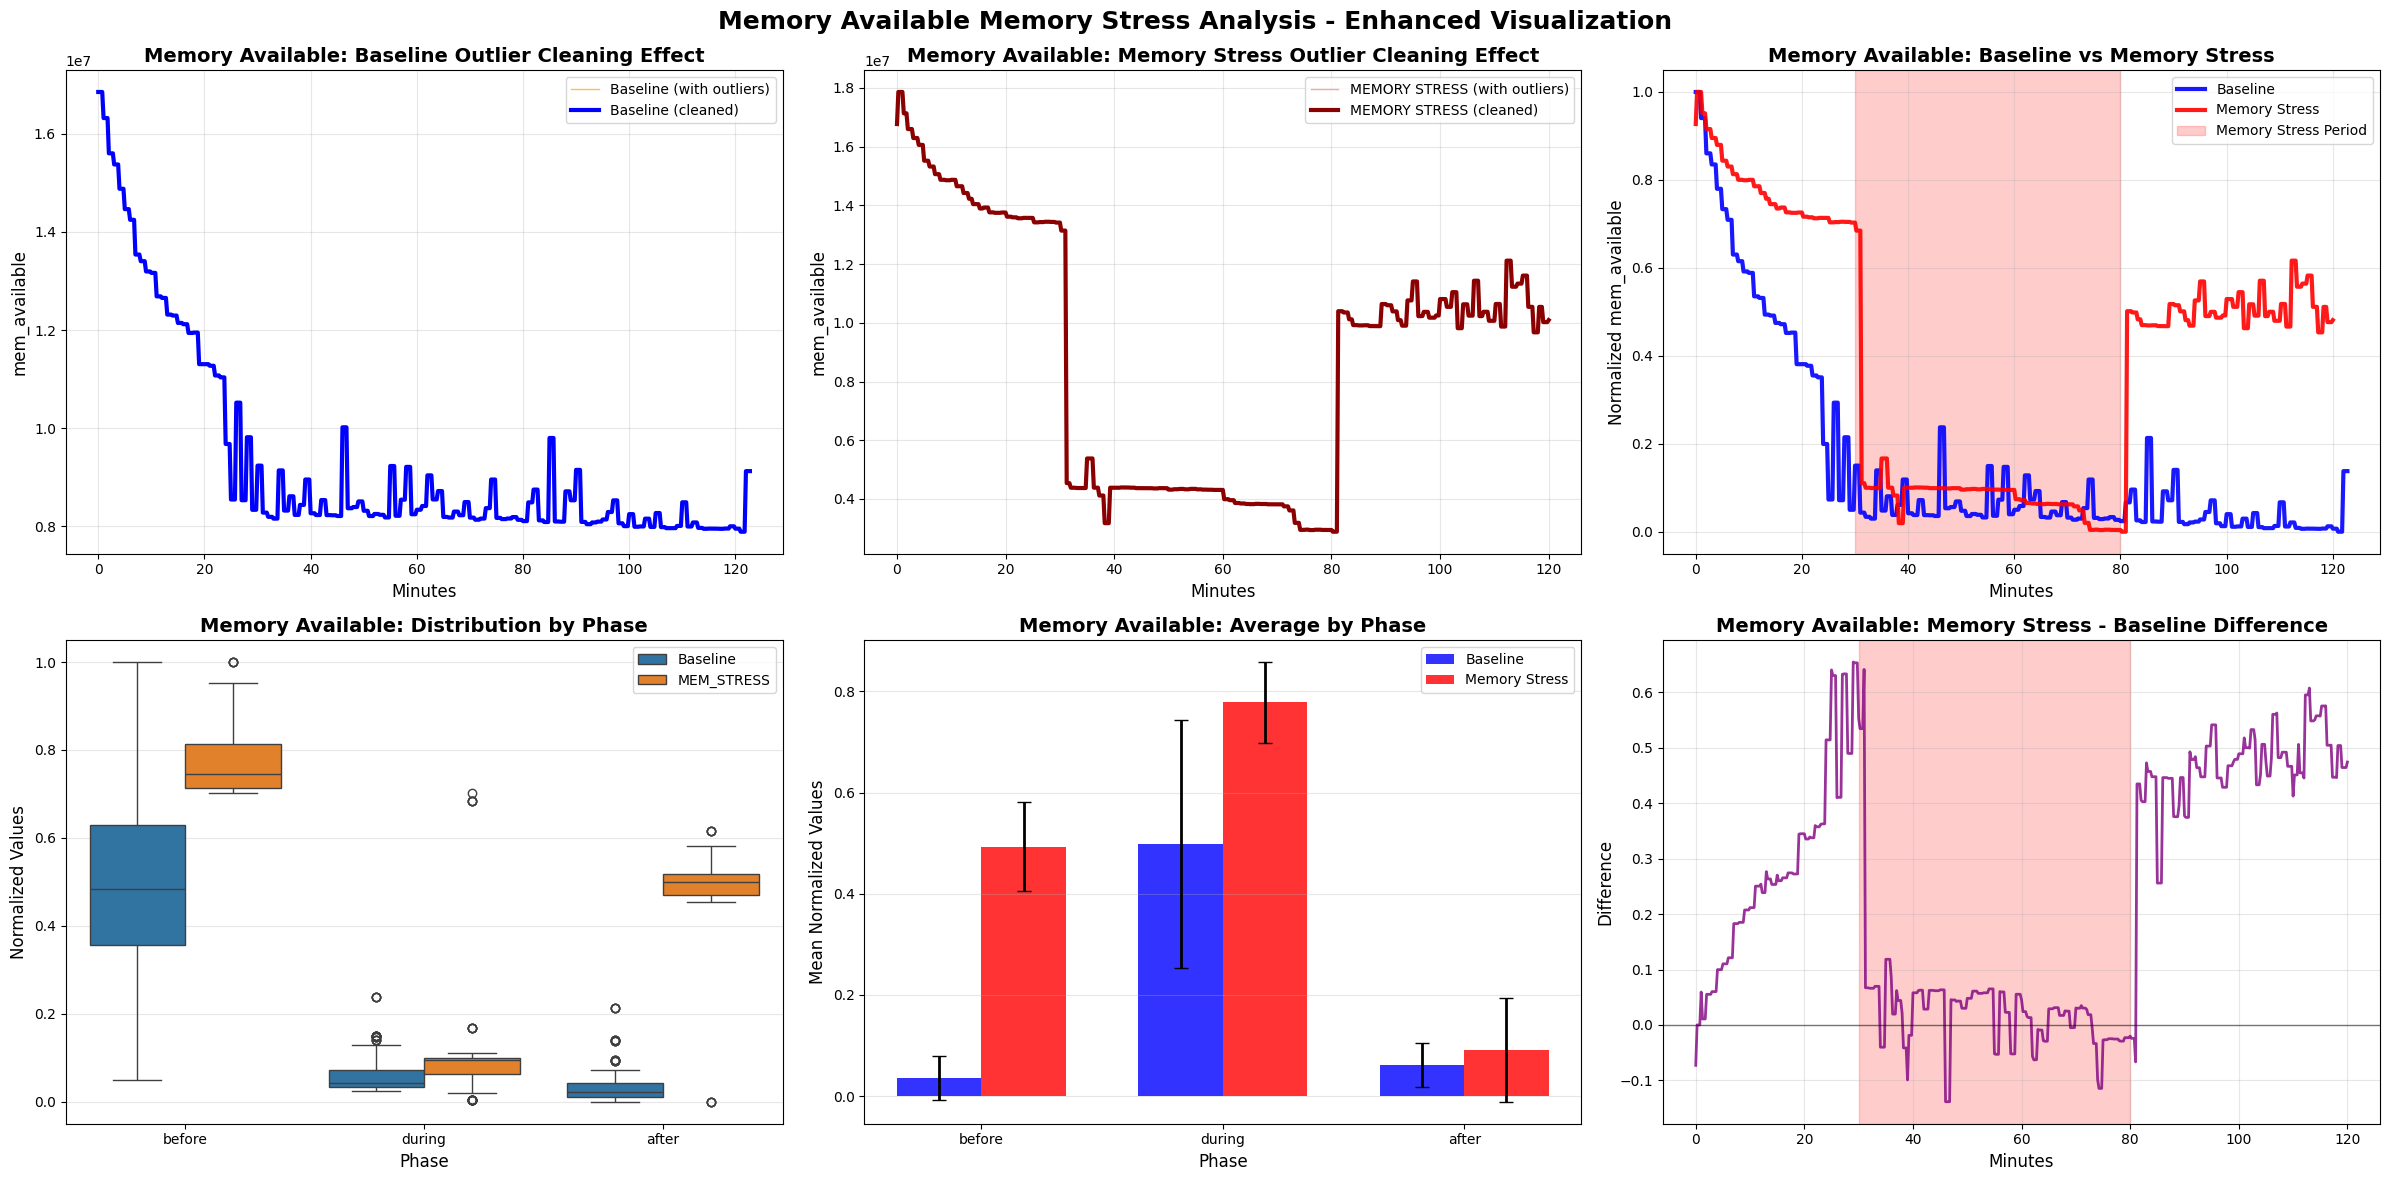


MEMORY AVAILABLE - MEMORY STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0360  0.0433  0.0000  0.2132
before  0.4979  0.2451  0.0498  1.0000
during  0.0617  0.0432  0.0241  0.2374

📊 MEMORY STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4931  0.0874  0.0000  0.6164
before  0.7779  0.0800  0.7030  1.0000
during  0.0910  0.1021  0.0038  0.7030

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-11.90, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= -3.75, p=  0.0002 (✅ SIGNIFICANT)
  AFTER   : t=-60.87, p=  0.0000 (✅ SIGNIFICANT)

📈 MEMORY STRESS IMPACT (% CHANGE):
  BEFORE  :  +56.24% (↗️ INCREASE)
  DURING  :  +47.57% (↗️ INCREASE)
  AFTER   : +1271.24% (↗️ INCREASE)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats

# Load all memory datasets
df_mem_util = pd.read_csv("mem_util.csv")
df_mem_cache = pd.read_csv("mem_cache.csv")
df_mem_available = pd.read_csv("mem_available.csv")

df_baseline_mem_util = pd.read_csv("../../baseline/memory related/mem_util.csv")
df_baseline_mem_cache = pd.read_csv("../../baseline/memory related/mem_cache.csv")
df_baseline_mem_available = pd.read_csv("../../baseline/memory related/mem_available.csv")

# Add source labels for MEMORY STRESS experiment
df_mem_util["source"] = "MEM_STRESS"
df_mem_cache["source"] = "MEM_STRESS"
df_mem_available["source"] = "MEM_STRESS"

df_baseline_mem_util["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_available["source"] = "BASELINE"

# Convert to datetime
df_mem_util["Time"] = pd.to_datetime(df_mem_util["Time"])
df_mem_cache["Time"] = pd.to_datetime(df_mem_cache["Time"])
df_mem_available["Time"] = pd.to_datetime(df_mem_available["Time"])

df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_mem_util["Time"].min() - df_mem_util["Time"].min()
df_mem_util["Time"] += time_offset
df_mem_cache["Time"] += time_offset
df_mem_available["Time"] += time_offset

# Convert timeline to minutes
all_dfs = [
    df_mem_util, df_mem_cache, df_mem_available,
    df_baseline_mem_util, df_baseline_mem_cache, df_baseline_mem_available
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ORIGINAL DATASETS DICTIONARY
original_datasets = {
    'Memory Utilization': {'mem_stress': df_mem_util, 'baseline': df_baseline_mem_util},
    'Memory Cache': {'mem_stress': df_mem_cache, 'baseline': df_baseline_mem_cache},
    'Memory Available': {'mem_stress': df_mem_available, 'baseline': df_baseline_mem_available}
}

# CONSERVATIVE OUTLIER DETECTION FOR MEMORY METRICS
def remove_outliers_comprehensive_memory(df, method='iqr', threshold=2.5):
    """
    Conservative outlier detection for memory metrics to avoid removing normal patterns
    like system initialization, gradual memory usage changes, etc.
    """
    df_clean = df.copy()
    outlier_stats = {}
    
    # Get all numeric columns except Time, Minutes, and source
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if method == 'iqr':
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            series = df[col]
            outlier_mask = pd.Series(False, index=df.index)
            
            if len(series) > 1:
                diff = series.diff().abs()
                if diff.std() > 0:  # Avoid division by zero
                    extreme_changes = diff > (3 * diff.std())  # Very large sudden changes
                    extreme_values = (series < lower_bound) | (series > upper_bound)
                    
                    outlier_mask = extreme_changes & extreme_values
            
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Only interpolate if we actually found outliers
            if outlier_mask.sum() > 0:
                df_clean.loc[outlier_mask, col] = np.nan
                df_clean[col] = df_clean[col].interpolate(method='linear')
                
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
print("=" * 80)
print("OUTLIER DETECTION AND CLEANING - MEMORY STRESS ANALYSIS")
print("=" * 80)

datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name}:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        df_clean, stats = remove_outliers_comprehensive_memory(df, method='iqr', threshold=2.5)
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print outlier summary
        total_outliers = sum([s['count'] for s in stats.values()])
        if total_outliers > 0:
            print(f"    ✅ Cleaned {total_outliers} outliers across all memory metrics")
        else:
            print(f"    ✅ No outliers detected")

# NORMALIZATION FUNCTION
def normalize_df_memory(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# ANALYSIS AND PLOT FUNCTION FOR MEMORY STRESS
def analyze_and_plot_memory_dataset_wide(dataset_name, mem_stress_df, baseline_df, delay_minutes, duration_minutes):
    # Get numeric columns for memory metrics
    numeric_cols = [col for col in mem_stress_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    mem_stress_norm = normalize_df_memory(mem_stress_df, numeric_cols)
    baseline_norm = normalize_df_memory(baseline_df, numeric_cols)
    
    # For memory metrics, we typically have single metrics, so we'll use the main metric
    main_metric = numeric_cols[0] if numeric_cols else None
    
    if main_metric is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    # Add phase information
    mem_stress_norm = add_phase_column(mem_stress_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    stats_mem_stress = mem_stress_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_metric],
        'MEM_STRESS': mem_stress_norm[main_metric],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': mem_stress_norm[main_metric] - baseline_norm[main_metric]
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['MEM_STRESS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        mem_stress_mean = stats_mem_stress.loc[phase, 'mean']
        impact[phase] = ((mem_stress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # WIDE PLOTTING
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    original_baseline = original_datasets[dataset_name]['baseline']
    
    plt.plot(original_baseline['Minutes'], original_baseline[main_metric], 
             label='Baseline (with outliers)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df[main_metric], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. MEMORY STRESS outlier cleaning effect
    plt.subplot(2, 3, 2)
    original_mem_stress = original_datasets[dataset_name]['mem_stress']
    
    plt.plot(original_mem_stress['Minutes'], original_mem_stress[main_metric], 
             label='MEMORY STRESS (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(mem_stress_df['Minutes'], mem_stress_df[main_metric], 
             label='MEMORY STRESS (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: Memory Stress Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_metric], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(mem_stress_norm['Minutes'], mem_stress_norm[main_metric], 
             label='Memory Stress', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Memory Stress Period")
    plt.title(f"{dataset_name}: Baseline vs Memory Stress", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_metric}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'MEM_STRESS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_mem_stress['mean'], width, label='Memory Stress', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_mem_stress['mean'], yerr=stats_mem_stress['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: Memory Stress - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Memory Stress Analysis - Enhanced Visualization', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - MEMORY STRESS ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 MEMORY STRESS STATISTICS BY PHASE:")
    print(stats_mem_stress.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 MEMORY STRESS IMPACT (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_mem_stress': stats_mem_stress,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_metric
    }

# RUN ANALYSIS
analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    mem_stress_clean = datasets_clean[dataset_name]['mem_stress']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_memory_dataset_wide(
        dataset_name, 
        mem_stress_clean, 
        baseline_clean, 
        delay, 
        duration
    )